# Stock price prediction using LSTM, Random Forest, SVR and ARIMA

*Here, in this code I have collected Apple stock price data, preprocess it, and trained different models including LSTM, Random Forest, SVR, and ARIMA. We then evaluated the models using performance metrics such as RMSE and plots the predictions.*


In [1]:
### Data Collection
import pandas_datareader as pdr
key = "ada9cd8da4fb0396f5704a9584d4f0ebdda3ca31"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)


C:\Users\MY PC\AppData\Local\Temp\ipykernel_17388\356823673.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


In [5]:
# Load the Apple stock prices dataset
df = pd.read_csv('AAPL.csv')

In [6]:
missing_values_df = df.isnull()

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-23 00:00:00+00:00,191.61,191.96,189.56,190.68,15989365,45.775378,45.858993,45.285636,45.553203,63957460,0.0,1.0
1,AAPL,2018-07-24 00:00:00+00:00,193.00,193.66,192.05,192.45,18697898,46.107448,46.265121,45.880494,45.976053,74791592,0.0,1.0
2,AAPL,2018-07-25 00:00:00+00:00,194.82,194.85,192.43,193.06,16826483,46.542243,46.549410,45.971275,46.121782,67305932,0.0,1.0
3,AAPL,2018-07-26 00:00:00+00:00,194.21,195.96,193.61,194.61,19075964,46.396515,46.814588,46.253176,46.492075,76303856,0.0,1.0
4,AAPL,2018-07-27 00:00:00+00:00,190.98,195.19,190.10,194.99,24023972,45.624872,46.630636,45.414641,46.582856,96095888,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-07-17 00:00:00+00:00,193.99,194.32,191.810,191.90,50520159,193.99,194.32,191.810,191.90,50520159,0.0,1.0
1254,AAPL,2023-07-18 00:00:00+00:00,193.73,194.33,192.415,193.35,48353774,193.73,194.33,192.415,193.35,48353774,0.0,1.0
1255,AAPL,2023-07-19 00:00:00+00:00,195.10,198.23,192.650,193.10,80507323,195.10,198.23,192.650,193.10,80507323,0.0,1.0
1256,AAPL,2023-07-20 00:00:00+00:00,193.13,196.47,192.495,195.09,59581196,193.13,196.47,192.495,195.09,59581196,0.0,1.0
1257,AAPL,2023-07-21 00:00:00+00:00,191.94,194.97,191.230,194.10,71951683,191.94,194.97,191.230,194.10,71951683,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
#Feature scaling is a common preprocessing step in machine learning to bring all the features of the dataset into a specific range.
#In this case, the range will be between 0 and 1.

In [11]:
## Splitting dataset into train and test split
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]


In [12]:
training_size, test_size

(817, 441)

In [13]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [15]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [16]:
# LSTM Model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 15s 488ms/step - loss: 0.0458 - val_loss: 0.0039
Epoch 2/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0127 

12/12 [==============================] - 3s 275ms/step - loss: 0.0015 - val_loss: 2.1990e-04
Epoch 70/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0015 - val_loss: 2.1021e-04
Epoch 71/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0012 - val_loss: 2.5602e-04
Epoch 72/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0019 - val_loss: 3.7779e-04
Epoch 73/100
12/12 [==============================] - 3s 275ms/step - loss: 0.0051 - val_loss: 2.9480e-04
Epoch 74/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0032 - val_loss: 2.3068e-04
Epoch 75/100
12/12 [==============================] - 3s 270ms/step - loss: 0.0018 - val_loss: 3.5179e-04
Epoch 76/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0016 - val_loss: 2.7532e-04
Epoch 77/100
12/12 [==============================] - 3s 274ms/step - loss: 0.0015 - val_loss: 2.0644e-04
Epoch 78/100
12/12 [==============================] - 3s 25

In [17]:
#            Access the training history...............
#history = lstm_model.history
#            Print the MSE for each epoch...........
#mse_values = history.history['loss']
#for epoch, mse in enumerate(mse_values):
#    print(f"Epoch {epoch+1} - MSE: {mse:.4f}")

In [18]:
### Prediction and performance metrics
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)


11/11 [==============================] - 0s 41ms/step


In [19]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))


In [20]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 0.03404414620484445
Test RMSE: 0.013375563573067637


In [21]:
### Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [22]:
train_predict_rf = rf_model.predict(X_train)
test_predict_rf = rf_model.predict(X_test)


In [23]:
train_rmse_rf = math.sqrt(mean_squared_error(y_train, train_predict_rf))
test_rmse_rf = math.sqrt(mean_squared_error(ytest, test_predict_rf))


In [24]:
print("Random Forest Train RMSE:", train_rmse_rf)
print("Random Forest Test RMSE:", test_rmse_rf)

Random Forest Train RMSE: 0.015238535232971041
Random Forest Test RMSE: 0.012763522545164998


In [25]:
### SVR Model
svr_model = SVR(kernel='rbf')    #radial basis function kernel:handle nonlinear relationships b/w features & target variable.
svr_model.fit(X_train, y_train)


SVR()

In [26]:
train_predict_svr = svr_model.predict(X_train)
test_predict_svr = svr_model.predict(X_test)


In [27]:
train_rmse_svr = math.sqrt(mean_squared_error(y_train, train_predict_svr))
test_rmse_svr = math.sqrt(mean_squared_error(ytest, test_predict_svr))


In [28]:
print("SVR Train RMSE:", train_rmse_svr)
print("SVR Test RMSE:", test_rmse_svr)


SVR Train RMSE: 0.06880980930165147
SVR Test RMSE: 0.03796173552006104


In [29]:
### ARIMA Model
arima_model = ARIMA(df1, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

In [30]:
train_predict_arima = arima_model_fit.predict(start=0, end=training_size-1)
test_predict_arima = arima_model_fit.predict(start=training_size, end=len(df1)-1)

In [31]:
train_rmse_arima = math.sqrt(mean_squared_error(df1[:training_size], train_predict_arima))
test_rmse_arima = math.sqrt(mean_squared_error(df1[training_size:], test_predict_arima))

In [32]:
print("ARIMA Train RMSE:", train_rmse_arima)
print("ARIMA Test RMSE:", test_rmse_arima)

ARIMA Train RMSE: 0.0355992807068388
ARIMA Test RMSE: 0.007459792633392848


In [33]:
### Plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [34]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

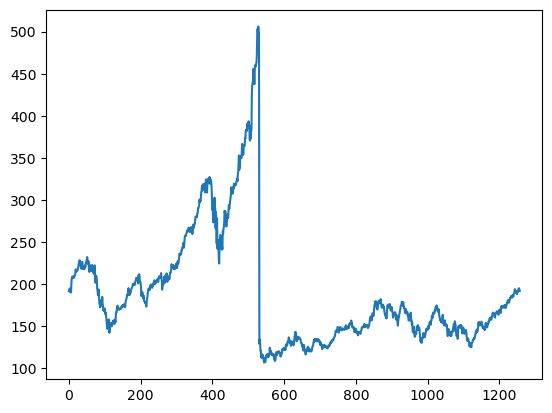

In [35]:
plt.plot(scaler.inverse_transform(df1))
#displays the actual stock prices (closing prices) of the Apple stock. 
#This plot serves as a reference for comparison with the predicted values.

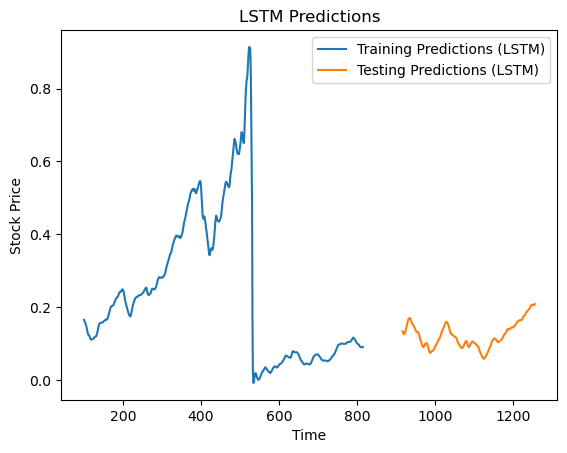

In [36]:
# LSTM plot
plt.plot(trainPredictPlot, label='Training Predictions (LSTM)')
plt.plot(testPredictPlot, label='Testing Predictions (LSTM)')

# Set the plot title and labels
plt.title('LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()


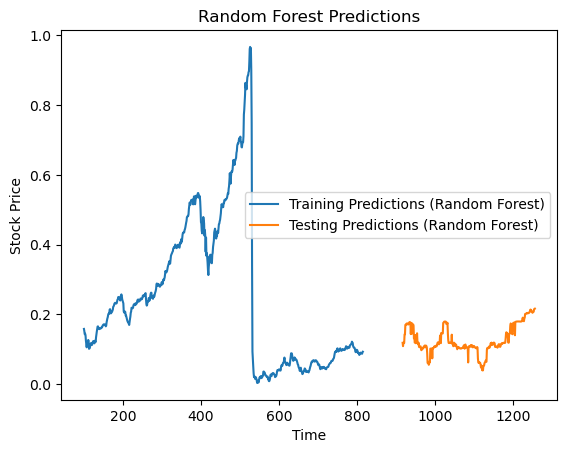

In [37]:
# Random Forest plot
trainPredictPlot_rf = np.empty_like(df1)
trainPredictPlot_rf[:, :] = np.nan
trainPredictPlot_rf[look_back:len(train_predict_rf)+look_back, :] = train_predict_rf.reshape(-1, 1)

testPredictPlot_rf = np.empty_like(df1)
testPredictPlot_rf[:, :] = np.nan
testPredictPlot_rf[len(train_predict_rf)+(look_back*2)+1:len(df1)-1, :] = test_predict_rf.reshape(-1, 1)

# Plot the training and testing predictions

plt.plot(trainPredictPlot_rf, label='Training Predictions (Random Forest)')
plt.plot(testPredictPlot_rf, label='Testing Predictions (Random Forest)')

# Set the plot title and labels
plt.title('Random Forest Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()

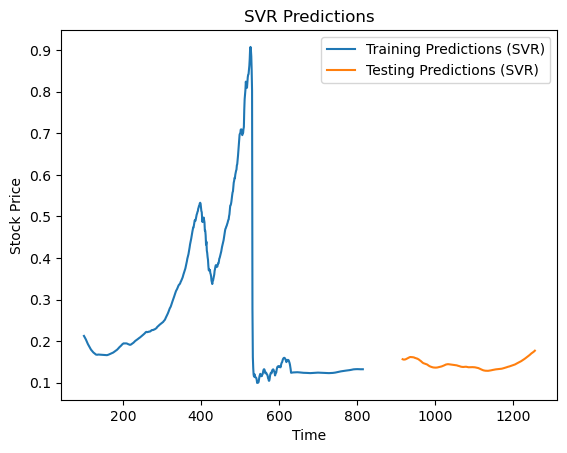

In [38]:
# SVR plot
trainPredictPlot_svr = np.empty_like(df1)
trainPredictPlot_svr[:, :] = np.nan
trainPredictPlot_svr[look_back:len(train_predict_svr) + look_back, :] = train_predict_svr.reshape(-1, 1)

testPredictPlot_svr = np.empty_like(df1)
testPredictPlot_svr[:, :] = np.nan
testPredictPlot_svr[len(train_predict_svr) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict_svr.reshape(-1, 1)

# Plot the training and testing predictions
plt.plot(trainPredictPlot_svr, label='Training Predictions (SVR)')
plt.plot(testPredictPlot_svr, label='Testing Predictions (SVR)')

# Set the plot title and labels
plt.title('SVR Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()


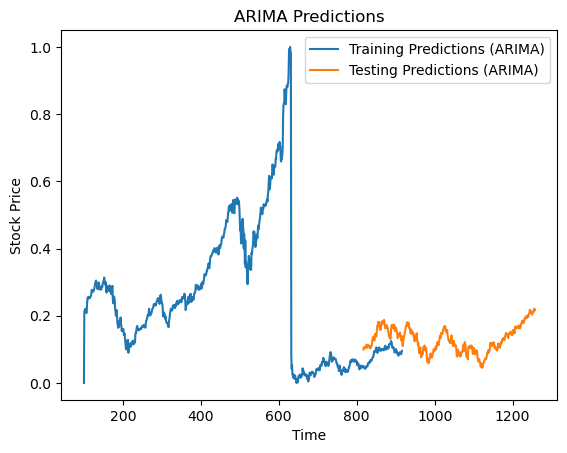

In [39]:
trainPredictPlot_arima = np.empty_like(df1)
trainPredictPlot_arima[:, :] = np.nan
trainPredictPlot_arima[look_back:len(train_predict_arima) + look_back, :] = train_predict_arima.reshape(-1, 1)

testPredictPlot_arima = np.empty_like(df1)
testPredictPlot_arima[:, :] = np.nan
testPredictPlot_arima[len(df1) - len(test_predict_arima):, :] = test_predict_arima.reshape(-1, 1)

# Plot the training and testing predictions
plt.plot(trainPredictPlot_arima, label='Training Predictions (ARIMA)')
plt.plot(testPredictPlot_arima, label='Testing Predictions (ARIMA)')

# Set the plot title and labels
plt.title('ARIMA Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()

